In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We see that we do not have any categorical columns.

We see that the First Column is just the index numbers hence we could drop the column

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.isnull().sum().any()

False

We see that we do not have any null values

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


We see that the minimum value in radio is 0. It may be a case where in radio was not chosen as a medium for advertisement or may be a error, lets check

In [8]:
df[df['radio']==0]

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,8.8


We see that there is only 1 row where in the radio is 0 hence we could drop it presuming it to be an error

In [9]:
df.drop(127,axis=0,inplace=True)

In [10]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='TV', ylabel='sales'>

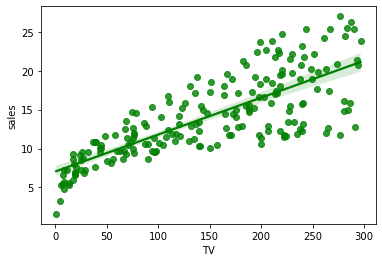

In [11]:
sns.regplot(x = df['TV'],y=df['sales'],color='green')

We see that as the spend on TV insreases, so thus the sales

<AxesSubplot:xlabel='radio', ylabel='sales'>

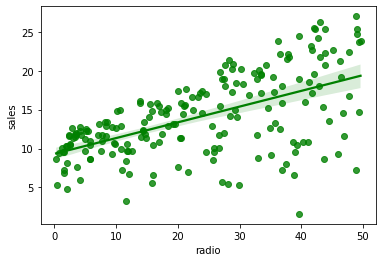

In [12]:
sns.regplot(x = df['radio'],y=df['sales'],color='green')

We see that as the spend on Radio insreases, so thus the sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

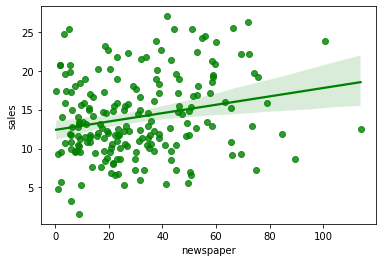

In [13]:
sns.regplot(x=df['newspaper'],y=df['sales'],color='green')

We see that as the spend on Newspaper insreases, so thus the sales

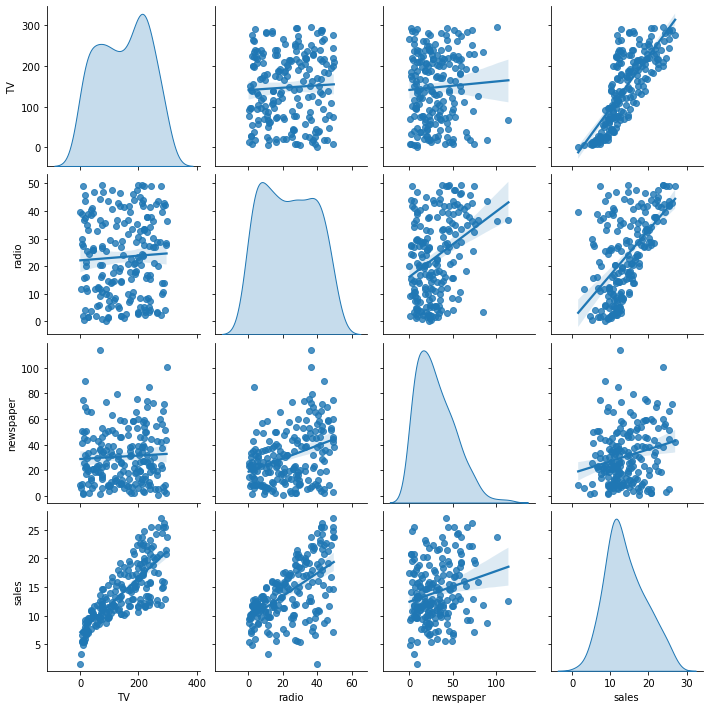

In [14]:
sns.pairplot(df,diag_kind='kde',kind='reg')

We see that the TV vs Sales follows a linear distribution, we see there is noise in data and the data us not normally distributed

### Checking Correlation

In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.049027,0.053002,0.781462
radio,0.049027,1.000000,0.349361,0.573310
newspaper,0.053002,0.349361,1.000000,0.224455
sales,0.781462,0.573310,0.224455,1.000000


<AxesSubplot:>

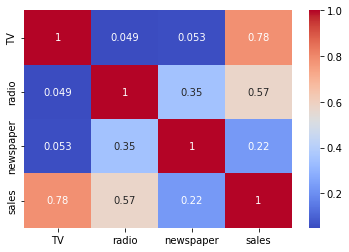

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

From above, we see that TV has the highest correlation with Sales and newspaper has the lowest correlation

### Checking Skewness

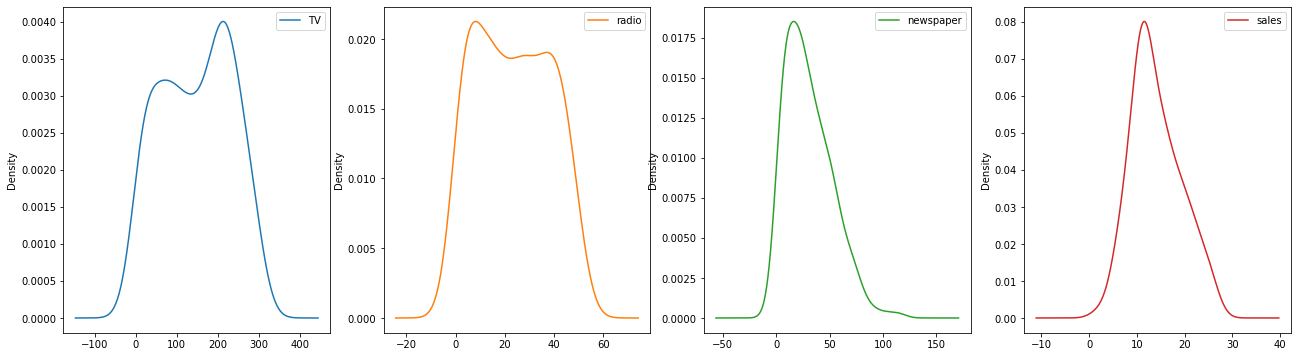

In [17]:
df.plot(kind='density',subplots=True,sharex=False,layout=(1,4),figsize=(22,6))
plt.show()

In [18]:
df.skew()

TV          -0.079446
radio        0.091614
newspaper    0.888932
sales        0.399546
dtype: float64

Setting the threshold for the skewness as +/-0.5, we see that newspaper has higher skewness

### Checking Outliers

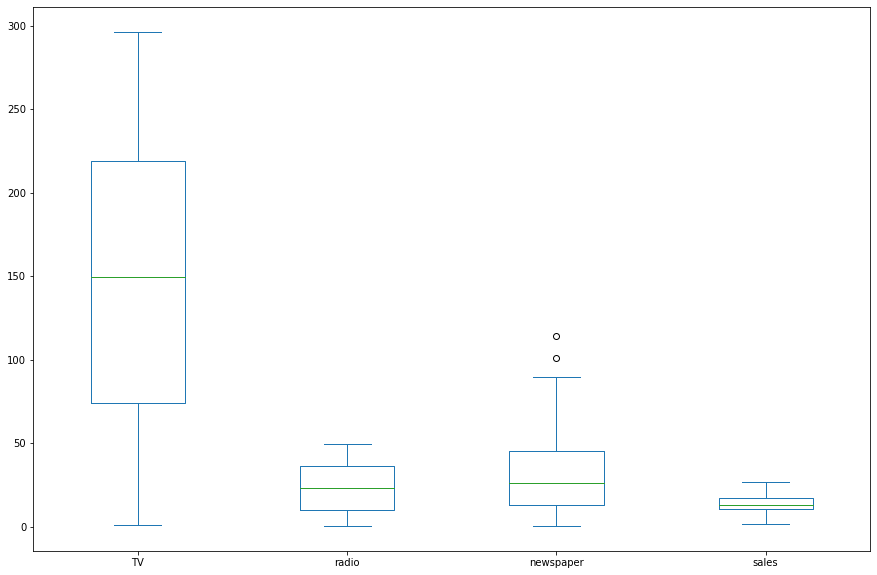

In [19]:
df.plot(kind='box',figsize=(15,10))
plt.show()

In [20]:
from scipy.stats import zscore

(np.abs(zscore(df)<3).all())

TV            True
radio         True
newspaper    False
sales         True
dtype: bool

we see a few outliers in newspaper

### Removing Outliers

In [21]:
z = np.abs(zscore(df))
z.shape

(199, 4)

In [22]:
df = df[(z<3).all(axis=1)]
df.shape

(197, 4)

### Percentage Data Loss

In [23]:
percentage_loss = (199-197)/199*100
percentage_loss

1.0050251256281406

### VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return(vif)

In [26]:
features = df.drop('sales',axis=1)

In [27]:
calculate_vif(features)

,Features,Values
0,TV,2.503884
1,radio,3.280226
2,newspaper,3.126006


We see that the VIF is below 5

### Splitting the data in x & y

In [28]:
x = df.drop('sales',axis=1)
x.shape

(197, 3)

In [29]:
y = df['sales']
y.shape

(197,)

### Normalizing the data using Power_Transform

In [30]:
from sklearn.preprocessing import power_transform

X = power_transform(x)

In [31]:
type(X)

numpy.ndarray

In [32]:
X = pd.DataFrame(X,columns=x.columns)
X

,TV,radio,newspaper
0,0.951750,0.966429,1.603432
1,-1.194449,1.044209,0.825675
2,-1.645315,1.373756,1.606308
3,0.137667,1.146171,1.280848
4,0.451397,-0.751124,1.277682
...,...,...,...
192,-1.290214,-1.444601,-0.694796
193,-0.526340,-1.307507,-1.151623
194,0.411481,-0.879467,-1.318927
195,1.464671,1.181408,1.516014


In [33]:
X.skew()

TV          -0.325394
radio       -0.231984
newspaper   -0.102682
dtype: float64

We see the skewness is well within the threshold

### Scalling the Model

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x

array([[ 9.51749612e-01,  9.66428834e-01,  1.60343150e+00],
       [-1.19444895e+00,  1.04420902e+00,  8.25675137e-01],
       [-1.64531514e+00,  1.37375644e+00,  1.60630818e+00],
       [ 1.37667028e-01,  1.14617073e+00,  1.28084791e+00],
       [ 4.51397378e-01, -7.51124115e-01,  1.27768223e+00],
       [-1.81770375e+00,  1.51747234e+00,  1.76655521e+00],
       [-1.00682685e+00,  6.98180881e-01, -1.09938227e-01],
       [-2.15138614e-01, -9.89357219e-02, -8.56560492e-01],
       [-1.81992055e+00, -1.65133655e+00, -2.09490024e+00],
       [ 6.47895332e-01, -1.58299158e+00, -2.34423997e-01],
       [-8.88615348e-01, -1.21179616e+00, -7.33924702e-02],
       [ 7.98677518e-01,  1.84507211e-01, -1.59831437e+00],
       [-1.52591711e+00,  8.23382157e-01,  1.50714963e+00],
       [-4.85738984e-01, -1.03418105e+00, -1.23771980e+00],
       [ 6.91694263e-01,  7.03692622e-01,  8.58457533e-01],
       [ 6.02829193e-01,  1.46040437e+00,  1.09862160e+00],
       [ 1.44409516e+00,  1.05962780e+00

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random_state',i,'the training accuracy is',r2_score(y_train,pred_train))
    print('At random_state',i,'the testing accuracy is',r2_score(y_test,pred_test))
    print()

At random_state 0 the training accuracy is 0.9063283715563664
At random_state 0 the testing accuracy is 0.9035128396422325

At random_state 1 the training accuracy is 0.9121334459954556
At random_state 1 the testing accuracy is 0.8772185464147984

At random_state 2 the training accuracy is 0.9143073341863888
At random_state 2 the testing accuracy is 0.8787326703943421

At random_state 3 the training accuracy is 0.9038292459974516
At random_state 3 the testing accuracy is 0.8991527885282591

At random_state 4 the training accuracy is 0.9082908631624187
At random_state 4 the testing accuracy is 0.8930260941494106

At random_state 5 the training accuracy is 0.9069224561198714
At random_state 5 the testing accuracy is 0.8888860086938959

At random_state 6 the training accuracy is 0.8996780233253038
At random_state 6 the testing accuracy is 0.9267011628110835

At random_state 7 the training accuracy is 0.904738081717063
At random_state 7 the testing accuracy is 0.9060900405918185

At random

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=55)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.90450118570665


### Cross Validation of the Model

In [38]:
Training_Accuracy = r2_score(y_train,pred_train)
Testing_Accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv = cross_val_score(lr,x,y,cv=j)
    cv_score = cv.mean()
    print(f"At cross fold {j} the cv score is {cv_score} and the accuracy score for training is {Training_Accuracy} and the accuracy for testing is {Testing_Accuracy}")
    print()

At cross fold 2 the cv score is 0.9022129576494526 and the accuracy score for training is -1.2533136444611994 and the accuracy for testing is 0.90450118570665

At cross fold 3 the cv score is 0.8992268977301769 and the accuracy score for training is -1.2533136444611994 and the accuracy for testing is 0.90450118570665

At cross fold 4 the cv score is 0.9002535117911487 and the accuracy score for training is -1.2533136444611994 and the accuracy for testing is 0.90450118570665

At cross fold 5 the cv score is 0.8954917094183215 and the accuracy score for training is -1.2533136444611994 and the accuracy for testing is 0.90450118570665

At cross fold 6 the cv score is 0.9001610076118327 and the accuracy score for training is -1.2533136444611994 and the accuracy for testing is 0.90450118570665

At cross fold 7 the cv score is 0.8967749648546117 and the accuracy score for training is -1.2533136444611994 and the accuracy for testing is 0.90450118570665

At cross fold 8 the cv score is 0.898547

cv is highest at 2 folds

In [39]:
def Model_reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(lr,x,y,cv=2)
    cv_score = cv.mean()*100
    print('Model Report :-')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE', mean_absolute_error(y_test,pred))
    r2_Score = r2_score(y_test,pred)*100
    print('r2_score :', r2_Score)
    print('cv_score :', cv_score)
    coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
    coef.plot(kind='bar',title = 'Model Coefficient')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [40]:
def Model_tree(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(lr,x,y,cv=2)
    cv_score = cv.mean()*100
    print('Model Report :-')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE', mean_absolute_error(y_test,pred))
    r2_Score = r2_score(y_test,pred)*100
    print('r2_score :', r2_Score)
    print('cv_score :', cv_score)
    coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
    coef.plot(kind='bar',title = 'Model Coefficient')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report :-
RMSE 1.5907840310512318
MAE 1.2481706010275215
r2_score : 90.450118570665
cv_score : 89.28785991358123
Difference between r2_score and cv is  1.1622586570837683


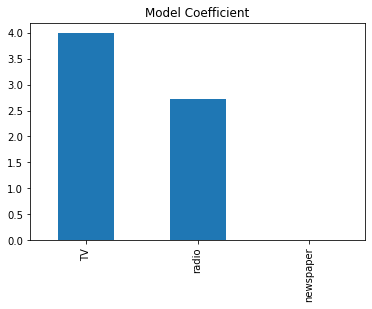

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Model_reg(lr)

Model Report :-
RMSE 1.5901320251733488
MAE 1.2473237729746631
r2_score : 90.45794528086164
cv_score : 89.28785991358123
Difference between r2_score and cv is  1.1700853672804072


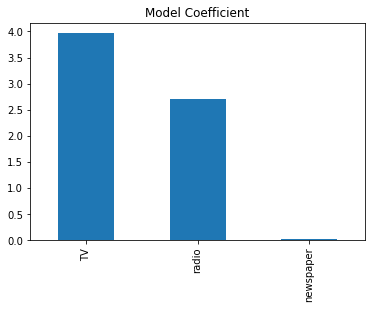

In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge()
Model_reg(ridge)

Model Report :-
RMSE 2.1375707428158273
MAE 1.6165405629312943
r2_score : 82.75685313529009
cv_score : 89.28785991358123
Difference between r2_score and cv is  -6.531006778291143


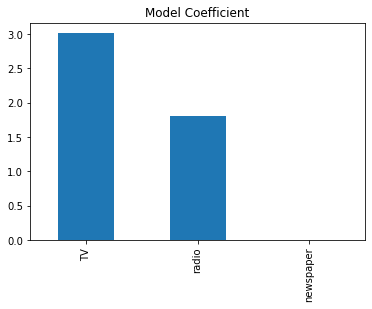

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso()
Model_reg(lasso)

Model Report :-
RMSE 1.0692286939658888
MAE 0.8574999999999999
r2_score : 95.68563639103908
cv_score : 89.28785991358123
Difference between r2_score and cv is  6.397776477457853


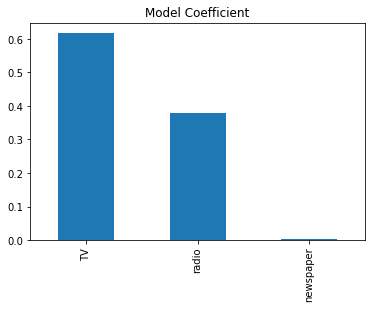

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
Model_tree(dtc)

Model Report :-
RMSE 0.6118949664770917
MAE 0.5119
r2_score : 98.58704186126155
cv_score : 89.28785991358123
Difference between r2_score and cv is  9.299181947680324


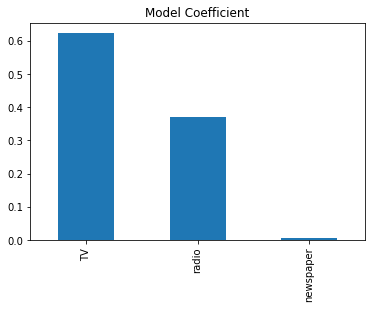

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
Model_tree(rf)

Model Report :-
RMSE 0.38209190648324687
MAE 0.29072500000000046
r2_score : 99.44905123861058
cv_score : 89.28785991358123
Difference between r2_score and cv is  10.16119132502935


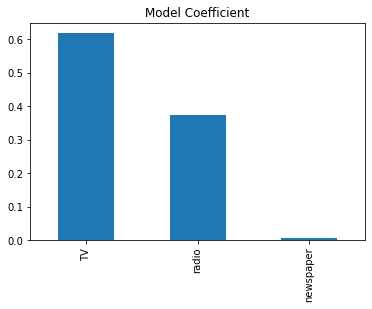

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
et =ExtraTreesRegressor()
Model_tree(et)

Model Report :-
RMSE 0.7768999003154525
MAE 0.6240535806293399
r2_score : 97.72225204455538
cv_score : 89.28785991358123
Difference between r2_score and cv is  8.434392130974146


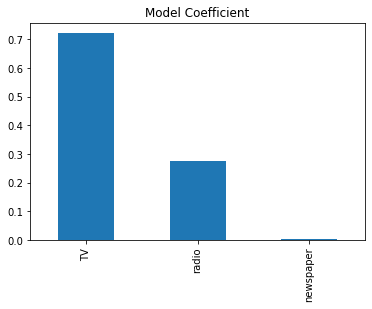

In [47]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
Model_tree(ad)

### Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
gcv = GridSearchCV(ridge,parameters,cv=2)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 0.001, 'solver': 'saga'}

In [49]:
gcv.best_estimator_

Ridge(alpha=0.001, solver='saga')

Model Report :-
RMSE 1.5911578493453633
MAE 1.248321344880787
r2_score : 90.44562979058784
cv_score : 89.28785991358123
Difference between r2_score and cv is  1.157769877006615


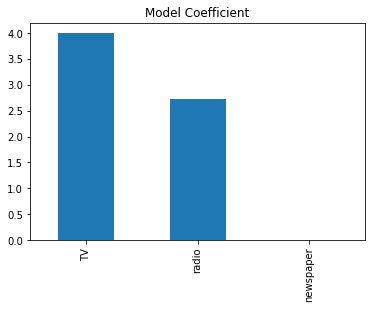

In [54]:
ridge = Ridge(alpha=0.01, solver='saga')

Model_reg(ridge)

### Best Model : Ridge(with Hyper Parameter Tuning)

Model Report :-
RMSE 1.591451456728326
MAE 1.248377268131934
r2_score : 90.44210343718278
cv_score : 89.28785991358123
Difference between r2_score and cv is  1.1542435236015507


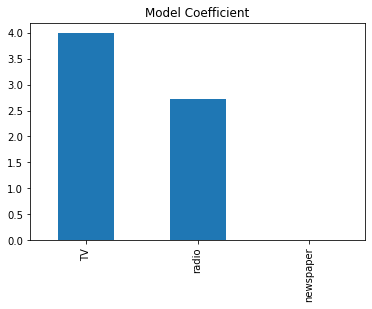

In [51]:
ridge = Ridge(alpha=0.01, solver='saga')

Model_reg(ridge)

### Saving the File

In [58]:
import pickle
filename = 'Advertising_Sales_Channel_Prediction.pkl'
pickle.dump(ridge,open(filename,'wb'))